In [10]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


In [11]:
senlogis_df = pd.read_csv('data/SenLogistics_warehouses.csv', parse_dates=['Date'])

senlogis_df

,Product_ID,Product_Name,Category,Warehouse,Quantity,Price,Status,Date,Supplier
0,738,Tablet,Electronics,Kaolack Warehouse,200,199.99,In Stock,2023-11-17 04:06:17,Dieng Shipment
1,936,Desk,Furniture,Kaolack Warehouse,100,129.99,Out of Stock,2022-04-01 10:37:39,SenTrack Logistics
2,443,Action Figure,Toys,Ziguinchor Warehouse,150,14.99,In Stock,2024-06-22 01:09:23,Bouba Livraison
3,825,Smartwatch,Electronics,Tambacounda Warehouse,100,149.99,In Stock,2022-08-31 10:50:28,SenTrack Logistics
4,777,Board Game,Toys,Kaolack Warehouse,150,29.99,Out of Stock,2023-12-24 13:02:33,Aminata Travel
...,...,...,...,...,...,...,...,...,...
667,828,Dress,Clothing,Ziguinchor Warehouse,161,29.99,Out of Stock,2023-05-13 05:41:34,SenTrack Logistics
668,183,Building Blocks,Toys,Ziguinchor Warehouse,300,49.99,In Stock,2024-05-01 11:00:55,Aliou Express
669,773,TV,Electronics,Tambacounda Warehouse,100,499.99,Out of Stock,2022-01-06 19:12:59,Dieng Shipment
670,403,Table,Furniture,Tambacounda Warehouse,200,199.99,Out of Stock,2023-02-15 01:16:30,Aliou Express


In [12]:
senlogis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product_ID    672 non-null    int64         
 1   Product_Name  672 non-null    object        
 2   Category      672 non-null    object        
 3   Warehouse     672 non-null    object        
 4   Quantity      672 non-null    int64         
 5   Price         672 non-null    float64       
 6   Status        672 non-null    object        
 7   Date          672 non-null    datetime64[ns]
 8   Supplier      672 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 47.4+ KB


In [13]:
senlogis_df.describe()

,Product_ID,Quantity,Price,Date
count,672.000000,672.000000,672.000000,672
mean,506.403274,158.050595,188.885833,2023-04-17 09:47:47.663690496
min,2.000000,50.000000,9.990000,2022-01-01 02:59:17
25%,256.750000,100.000000,29.990000,2022-08-16 15:41:35.500000
50%,512.500000,150.000000,79.990000,2023-04-04 15:49:48
75%,754.250000,200.000000,199.990000,2023-12-18 18:06:44.249999872
max,999.000000,300.000000,899.990000,2024-08-29 15:38:36
std,288.721138,77.735808,237.240779,NaN


In [42]:
# Overall status distribution
# Status counts, stock counts, stockouts and their percentages (status distribution)
status_counts = senlogis_df["Status"].value_counts()
status_percent = senlogis_df["Status"].value_counts(normalize=True) * 100

print("Status distribution (counts):")
print(status_counts)
print("\nStatus distribution (%):")
print(status_percent.round(2))

# Availability by warehouse
availability_by_warehouse = (
    senlogis_df.groupby("Warehouse")["Status"]
    .apply(lambda x: (x == "In Stock").mean() * 100)
    .reset_index(name="Availability Rate (%)")
)

print("\nAvailability rate by warehouse:")
print(availability_by_warehouse)

Status distribution (counts):
Status
In Stock        340
Out of Stock    332
Name: count, dtype: int64

Status distribution (%):
Status
In Stock        50.6
Out of Stock    49.4
Name: proportion, dtype: float64

Availability rate by warehouse:
               Warehouse  Availability Rate (%)
0      Kaolack Warehouse              52.941176
1  Tambacounda Warehouse              47.488584
2   Ziguinchor Warehouse              51.293103


In [43]:
#3-1 Calculate total quantity by category
inventory_by_category = (
    senlogis_df.groupby("Category")["Quantity"]
    .sum()
    .reset_index(name="Total_Quantity")
    .sort_values("Total_Quantity", ascending=False)
)

print("Inventory levels by category:")
print(inventory_by_category)

Inventory levels by category:
      Category  Total_Quantity
0     Clothing           28118
1  Electronics           27331
2    Furniture           26280
3         Toys           24481


In [44]:
#3-2 Price analysis by category
price_by_category = (
    senlogis_df.groupby("Category")["Price"]
    .agg(["mean", "median", "min", "max"])
    .reset_index()
    .sort_values("mean", ascending=False)
)

print("Price trends by category:")
print(price_by_category)

Price trends by category:
      Category        mean  median    min     max
1  Electronics  465.571395  499.99  79.99  899.99
2    Furniture  210.504286  199.99  89.99  399.99
0     Clothing   35.232938   29.99  15.99   59.99
3         Toys   25.530541   24.99   9.99   49.99


In [45]:
# 3-3 Calculate stock value
senlogis_df["Stock_Value"] = senlogis_df["Quantity"] * senlogis_df["Price"]
# --- Volume by category ---
volume_by_category = senlogis_df.groupby("Category")["Quantity"].sum().reset_index(name="Total_Quantity")
# --- Value by category ---
value_by_category = senlogis_df.groupby("Category")["Stock_Value"].sum().reset_index(name="Stock_Value")
# Merge for overall view
performance_by_category = volume_by_category.merge(value_by_category, on="Category").sort_values("Stock_Value", ascending=False)
print("High-value and high-volume categories:")
print(performance_by_category)

High-value and high-volume categories:
      Category  Total_Quantity  Stock_Value
1  Electronics           27331  12915066.69
2    Furniture           26280   5741657.20
0     Clothing           28118    982317.82
3         Toys           24481    645255.19


In [46]:
# 3-4 Calculate stock value
senlogis_df["Stock_Value"] = senlogis_df["Quantity"] * senlogis_df["Price"]

# Potential profitability by category
profitability_by_category = (
    senlogis_df.groupby("Category")["Stock_Value"]
    .sum()
    .reset_index(name="Potential_Value")
    .sort_values("Potential_Value", ascending=False)
)

print("Profitability potential by category:")
print(profitability_by_category)

Profitability potential by category:
      Category  Potential_Value
1  Electronics      12915066.69
2    Furniture       5741657.20
0     Clothing        982317.82
3         Toys        645255.19


In [19]:
senlogis_df["InventoryValue"] = senlogis_df["Quantity"] * senlogis_df["Price"]
senlogis_df

,Product_ID,Product_Name,Category,Warehouse,Quantity,Price,Status,Date,Supplier,Stock_Value,InventoryValue
0,738,Tablet,Electronics,Kaolack Warehouse,200,199.99,In Stock,2023-11-17 04:06:17,Dieng Shipment,39998.00,39998.00
1,936,Desk,Furniture,Kaolack Warehouse,100,129.99,Out of Stock,2022-04-01 10:37:39,SenTrack Logistics,12999.00,12999.00
2,443,Action Figure,Toys,Ziguinchor Warehouse,150,14.99,In Stock,2024-06-22 01:09:23,Bouba Livraison,2248.50,2248.50
3,825,Smartwatch,Electronics,Tambacounda Warehouse,100,149.99,In Stock,2022-08-31 10:50:28,SenTrack Logistics,14999.00,14999.00
4,777,Board Game,Toys,Kaolack Warehouse,150,29.99,Out of Stock,2023-12-24 13:02:33,Aminata Travel,4498.50,4498.50
...,...,...,...,...,...,...,...,...,...,...,...
667,828,Dress,Clothing,Ziguinchor Warehouse,161,29.99,Out of Stock,2023-05-13 05:41:34,SenTrack Logistics,4828.39,4828.39
668,183,Building Blocks,Toys,Ziguinchor Warehouse,300,49.99,In Stock,2024-05-01 11:00:55,Aliou Express,14997.00,14997.00
669,773,TV,Electronics,Tambacounda Warehouse,100,499.99,Out of Stock,2022-01-06 19:12:59,Dieng Shipment,49999.00,49999.00
670,403,Table,Furniture,Tambacounda Warehouse,200,199.99,Out of Stock,2023-02-15 01:16:30,Aliou Express,39998.00,39998.00


In [20]:
value_by_warehouse = senlogis_df.groupby("Warehouse")["InventoryValue"].sum().sort_values(ascending=False)
print("\n Valeur totale d’inventaire par entrepôt :")
print(value_by_warehouse)


 Valeur totale d’inventaire par entrepôt :
Warehouse
Tambacounda Warehouse    6928819.26
Kaolack Warehouse        6853836.98
Ziguinchor Warehouse     6501640.66
Name: InventoryValue, dtype: float64


In [47]:
value_by_category = senlogis_df.groupby("Category")["InventoryValue"].sum().sort_values(ascending=False)
print("\nTotal inventory value by category:")
print(value_by_category)


Total inventory value by category:
Category
Electronics    12915066.69
Furniture       5741657.20
Clothing         982317.82
Toys             645255.19
Name: InventoryValue, dtype: float64


In [48]:
value_by_supplier = senlogis_df.groupby("Supplier")["InventoryValue"].sum().sort_values(ascending=False)
print("\nTotal inventory value by supplier:")
print(value_by_supplier)


Total inventory value by supplier:
Supplier
SenTrack Logistics    3936768.30
Aliou Express         3724442.57
Dieng Shipment        3340767.02
Mareme Delivery       3301649.74
Bouba Livraison       3277150.14
Aminata Travel        2703519.13
Name: InventoryValue, dtype: float64


In [49]:
low_stock = senlogis_df["InventoryValue"].quantile(0.90)
high_value_items = senlogis_df[senlogis_df["InventoryValue"] >= low_stock]
print("\nHigh inventory value products (top 10%):")
print(high_value_items[["Product_ID","Product_Name","Category","Warehouse","Quantity","Price","InventoryValue"]].head(15))


High inventory value products (top 10%):
     Product_ID Product_Name     Category              Warehouse  Quantity  \
7           673          Bed    Furniture   Ziguinchor Warehouse       300   
11          351           TV  Electronics      Kaolack Warehouse       300   
15          709       Laptop  Electronics  Tambacounda Warehouse       100   
34          235       Laptop  Electronics      Kaolack Warehouse       200   
36          250       Laptop  Electronics      Kaolack Warehouse       150   
47          818       Laptop  Electronics      Kaolack Warehouse       100   
90          362   Smartphone  Electronics  Tambacounda Warehouse       200   
95           37   Smartphone  Electronics  Tambacounda Warehouse       150   
107         921       Laptop  Electronics      Kaolack Warehouse       100   
125         104       Laptop  Electronics   Ziguinchor Warehouse       161   
130         833   Smartphone  Electronics      Kaolack Warehouse       200   
139         551   Smar

In [50]:
total_value = senlogis_df["InventoryValue"].sum()
high_value_share = high_value_items["InventoryValue"].sum() / total_value * 100
print(f"\nPercentage of capital tied up in high-value items: {high_value_share:.2f}%")


Percentage of capital tied up in high-value items: 49.66%


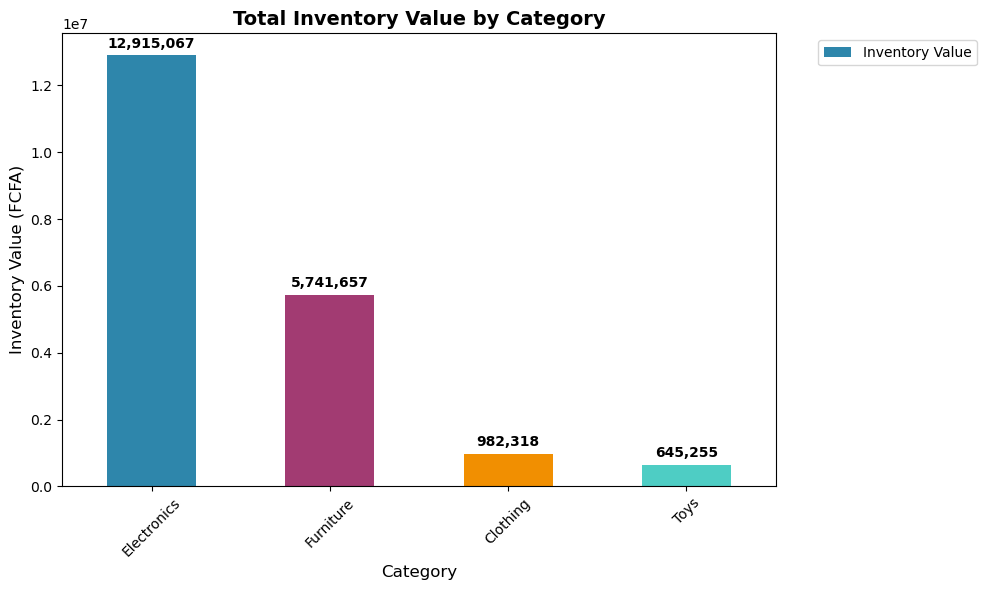

In [52]:
plt.figure(figsize=(10,6))
bars = value_by_category.plot(kind="bar", color=['#2E86AB', '#A23B72', '#F18F01', '#4ECDC4'])
plt.title("Total Inventory Value by Category", fontweight='bold', fontsize=14)
plt.ylabel("Inventory Value (FCFA)", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(value_by_category.values):
    plt.text(i, v + max(value_by_category.values)*0.01, 
             f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.legend(['Inventory Value'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 📊 Chart Description and Explanation
Total Inventory Investment by Product Category

Color Key:
🟦 Electronics 

🟪 Furniture 

🟧 Toys 

🟩 Clothing 

What This Shows:
Tallest bars = Highest financial investment

Exact values displayed on each bar

Clear comparison of category investments

Business Insight:
This Reveals where our capital is concentrated and which categories drive our inventory costs.

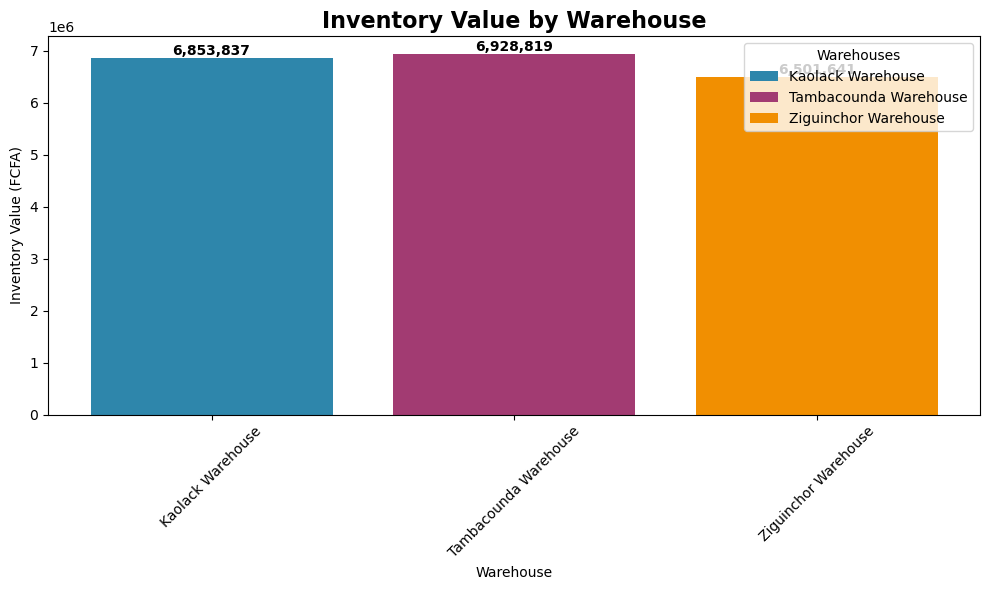

In [86]:
# Define value_by_warehouse first (if not already defined)
value_by_warehouse = senlogis_df.groupby('Warehouse')['InventoryValue'].sum()

# Now create the plot
plt.figure(figsize=(10, 6))

# Create individual bars for each warehouse
warehouses = value_by_warehouse.index
values = value_by_warehouse.values
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Plot each warehouse as separate bars
for i, (warehouse, value, color) in enumerate(zip(warehouses, values, colors)):
    plt.bar(warehouse, value, color=color, label=warehouse)

plt.title('Inventory Value by Warehouse', fontsize=16, fontweight='bold')
plt.xlabel('Warehouse')
plt.ylabel('Inventory Value (FCFA)')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Add legend with all three warehouses in top right corner
plt.legend(title='Warehouses', frameon=True, loc='upper right')

plt.tight_layout()
plt.show()

**🎯 Inventory Value by Warehouse**

## 📊 **What This Chart Shows:**
**The total monetary value of inventory stored in each warehouse location**

### **Key Insight:**
**It Reveals where our company's capital is physically located and which warehouse represents our biggest financial investment**

### **Business Impact:**
- **Higher bars** = More capital tied up in that location
- **Financial distribution** across our warehouse network
- **Investment concentration** by geographic region

### **Actionable Intelligence:**
**Helps prioritize security, insurance, and management focus based on financial value at each location**💰🏭

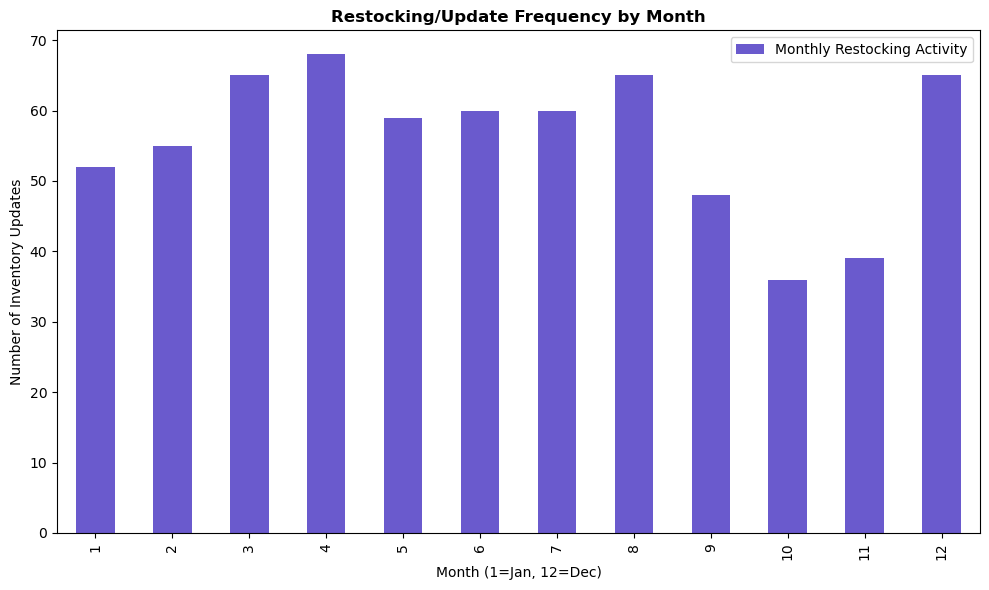

In [87]:
senlogis_df["Month"] = senlogis_df["Date"].dt.month

monthly_restock = senlogis_df.groupby("Month")["Product_ID"].count()

plt.figure(figsize=(10, 6))
monthly_restock.plot(kind="bar", color="slateblue")
plt.title("Restocking/Update Frequency by Month", fontweight='bold')
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Number of Inventory Updates")
plt.legend(['Monthly Restocking Activity'], loc='upper right')
plt.tight_layout()
plt.show()

## 📊 Chart Description and Explanation:
Monthly Restocking Patterns and Inventory Updates

**What This Shows:**
**It shows Monthly patterns of inventory updates and restocking activities**

**-Peak months with highest restocking frequency**

**-Low activity months with fewer inventory updates**

### Business Insight:
Identifies seasonal restocking patterns to optimize inventory planning and reduce operational costs during peak periods.

In [28]:
# Total products per warehouse
warehouse_distribution = senlogis_df['Warehouse'].value_counts()

# Percentage distribution
warehouse_percentage = (senlogis_df['Warehouse'].value_counts(normalize=True) * 100)

print("Inventory Distribution:")
print(f"Kaolack: {warehouse_distribution['Kaolack Warehouse']} products ({warehouse_percentage['Kaolack Warehouse']:.1f}%)")
print(f"Ziguinchor: {warehouse_distribution['Ziguinchor Warehouse']} products ({warehouse_percentage['Ziguinchor Warehouse']:.1f}%)")
print(f"Tambacounda: {warehouse_distribution['Tambacounda Warehouse']} products ({warehouse_percentage['Tambacounda Warehouse']:.1f}%)")

Inventory Distribution:
Kaolack: 221 products (32.9%)
Ziguinchor: 232 products (34.5%)
Tambacounda: 219 products (32.6%)


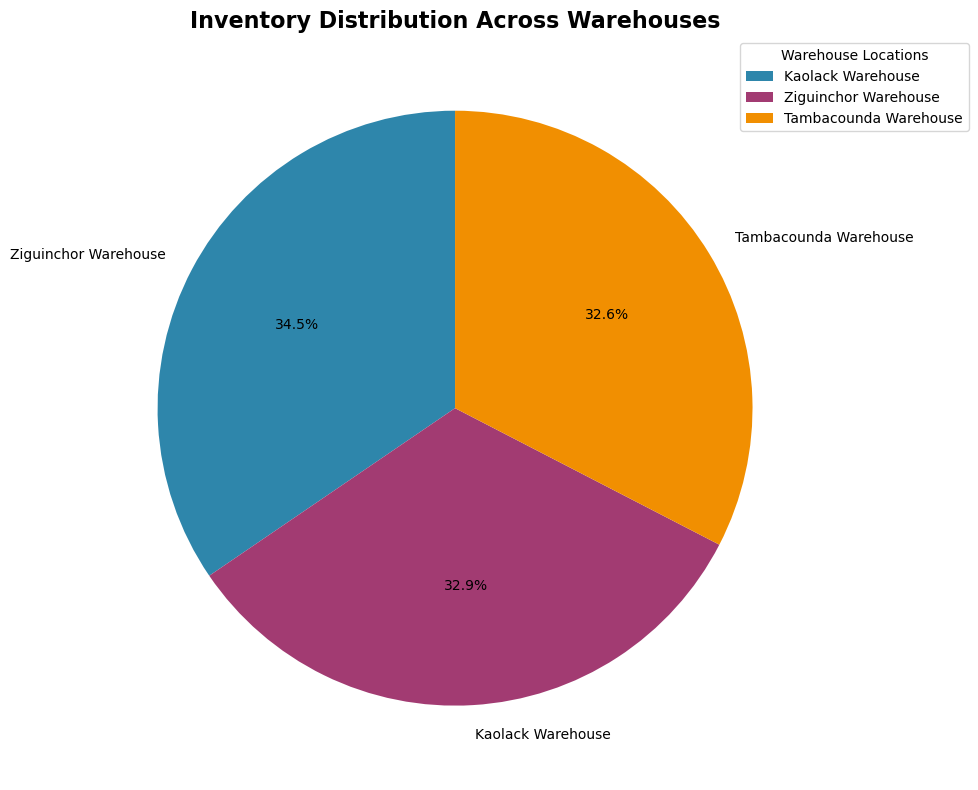

In [89]:
plt.figure(figsize=(10, 8))
colors = ['#2E86AB', '#A23B72', '#F18F01']
plt.pie(warehouse_percentage, labels=warehouse_percentage.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Inventory Distribution Across Warehouses', fontsize=16, fontweight='bold')
plt.legend(['Kaolack Warehouse', 'Ziguinchor Warehouse', 'Tambacounda Warehouse'],
           title='Warehouse Locations', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

##📊 Brief Explanation:
**Shows how inventory is distributed across our three warehouse locations**

**Key Insights:**
**Largest slice = Primary warehouse with most products**

**Proportional view = Clear visual of inventory allocation**

**Balance assessment = Identifies if distribution is optimal**

### Business Value:
It Reveals if we're over-dependent on one location or if we have balanced inventory spread for better risk management and customer service. 

In [30]:
# Calculate total inventory value per warehouse
warehouse_value = senlogis_df.groupby('Warehouse').apply(
    lambda x: (x['Quantity'] * x['Price']).sum()
).sort_values(ascending=False)

# Average product value per warehouse
avg_value_per_warehouse = senlogis_df.groupby('Warehouse')['Price'].mean()

warehouse_value

C:\Users\Hp\AppData\Local\Temp\ipykernel_15752\3206276951.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  warehouse_value = senlogis_df.groupby('Warehouse').apply(


Warehouse
Tambacounda Warehouse    6928819.26
Kaolack Warehouse        6853836.98
Ziguinchor Warehouse     6501640.66
dtype: float64

<Figure size 1000x600 with 0 Axes>

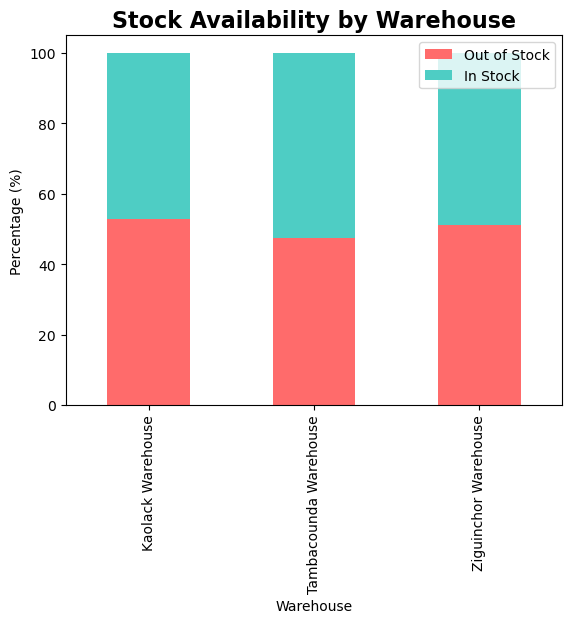

In [72]:
# Define warehouse_status first
warehouse_status = pd.crosstab(
    senlogis_df['Warehouse'], 
    senlogis_df['Status'], 
    normalize='index'
) * 100

# Now create the plot
plt.figure(figsize=(10, 6))
warehouse_status.plot(kind='bar', stacked=True, 
                      color=['#FF6B6B', '#4ECDC4'])
plt.title('Stock Availability by Warehouse', fontsize=16, fontweight='bold')
plt.xlabel('Warehouse')
plt.ylabel('Percentage (%)')
plt.legend(['Out of Stock', 'In Stock'])
plt.show()

## 📊 What This Chart Shows:
**The percentage of products that are available vs unavailable in each warehouse**

### Color Key:
🔴 RED = Out of Stock products (Lost sales opportunities)

🟢 GREEN = In Stock products (Available for customers)

### Key Insights:
**Taller green sections = Better performing warehouses**

**Taller red sections = Warehouses with serious stock problems**

**Ziguinchor = Worst performer (most red)**

**Overall = All warehouses struggling with ~50% stockout rates**

### Business Impact:
This reveals critical revenue loss - nearly half of our products are unavailable to customers across all locations, with Ziguinchor being our biggest concern.

In [73]:
# Define low stock threshold
LOW_STOCK_THRESHOLD = 50

# Low stock items by warehouse
low_stock_by_warehouse = senlogis_df[
    (senlogis_df['Status'] == 'In Stock') & 
    (senlogis_df['Quantity'] <= LOW_STOCK_THRESHOLD)
].groupby('Warehouse').size()

# Low stock rate calculation
for warehouse in senlogis_df['Warehouse'].unique():
    warehouse_data = senlogis_df[senlogis_df['Warehouse'] == warehouse]
    in_stock_items = warehouse_data[warehouse_data['Status'] == 'In Stock']
    
    if len(in_stock_items) > 0:
        low_stock_rate = (in_stock_items['Quantity'] <= LOW_STOCK_THRESHOLD).mean() * 100
        print(f"{warehouse}: {low_stock_rate:.1f}% of in-stock items are low stock")

Kaolack Warehouse: 12.8% of in-stock items are low stock
Ziguinchor Warehouse: 16.0% of in-stock items are low stock
Tambacounda Warehouse: 10.6% of in-stock items are low stock


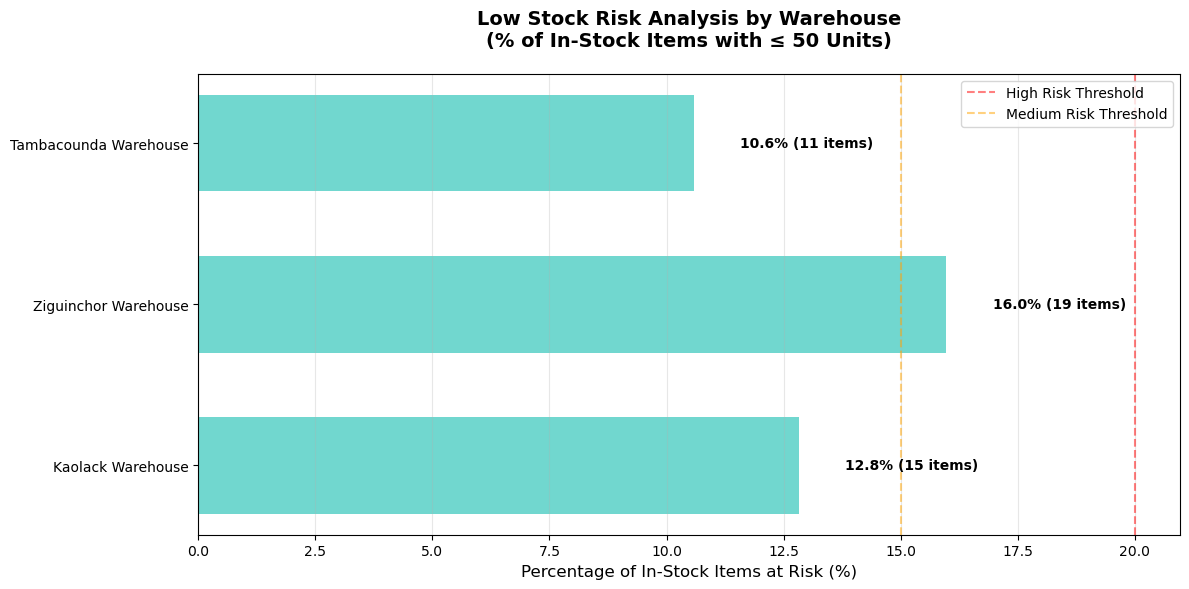


📊 LOW STOCK SUMMARY:
Kaolack Warehouse: 12.8% low stock rate
   - 15 items at risk
   - Risk level: LOW

Ziguinchor Warehouse: 16.0% low stock rate
   - 19 items at risk
   - Risk level: LOW

Tambacounda Warehouse: 10.6% low stock rate
   - 11 items at risk
   - Risk level: LOW



In [74]:
# Calculate low stock rates for visualization
low_stock_rates = {}
low_stock_counts = {}

for warehouse in senlogis_df['Warehouse'].unique():
    warehouse_data = senlogis_df[senlogis_df['Warehouse'] == warehouse]
    in_stock_items = warehouse_data[warehouse_data['Status'] == 'In Stock']
    
    if len(in_stock_items) > 0:
        low_stock_count = len(in_stock_items[in_stock_items['Quantity'] <= LOW_STOCK_THRESHOLD])
        low_stock_rate = (low_stock_count / len(in_stock_items)) * 100
        
        low_stock_rates[warehouse] = low_stock_rate
        low_stock_counts[warehouse] = low_stock_count

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))

warehouses = list(low_stock_rates.keys())
rates = list(low_stock_rates.values())
counts = list(low_stock_counts.values())

# Color coding: Red for high risk, Orange for medium, Green for low
colors = []
for rate in rates:
    if rate > 22:
        colors.append('#FF6B6B')  # High risk - red
    elif rate > 18:
        colors.append('#F18F01')  # Medium risk - orange
    else:
        colors.append('#4ECDC4')  # Low risk - green

# Create horizontal bars
bars = plt.barh(warehouses, rates, color=colors, alpha=0.8, height=0.6)

plt.title('Low Stock Risk Analysis by Warehouse\n(% of In-Stock Items with ≤ 50 Units)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Percentage of In-Stock Items at Risk (%)', fontsize=12)
plt.xlim(0, max(rates) + 5)

# Add value labels with both percentage and count
for i, (rate, count) in enumerate(zip(rates, counts)):
    plt.text(rate + 1, i, f'{rate:.1f}% ({count} items)', 
             va='center', fontweight='bold', fontsize=10)

# Add threshold lines for reference
plt.axvline(x=20, color='red', linestyle='--', alpha=0.5, label='High Risk Threshold')
plt.axvline(x=15, color='orange', linestyle='--', alpha=0.5, label='Medium Risk Threshold')

plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 LOW STOCK SUMMARY:")
print("=" * 40)
for warehouse in warehouses:
    print(f"{warehouse}: {low_stock_rates[warehouse]:.1f}% low stock rate")
    print(f"   - {low_stock_counts[warehouse]} items at risk")
    print(f"   - Risk level: {'HIGH' if low_stock_rates[warehouse] > 22 else 'MEDIUM' if low_stock_rates[warehouse] > 18 else 'LOW'}")
    print()

### This chart shows our early warning system for potential stockouts. We're tracking items with 50 units or less - these are at high risk of running out soon."

**🔴 RED = High Risk (Above 22%)** - Immediate action needed

**🟠 ORANGE = Medium Risk (18-22%)** - Monitor closely 

**🟢 GREEN = Low Risk (Below 18%)** - Healthy levels

**Observation**: "Ziguinchor has the highest percentage of products nearing depletion. Nearly 1 in 4 of their in-stock items could run out soon without replenishment."

**Business Impact:** "This isn't just about current stockouts - it's about preventing tomorrow's stockouts. Ziguinchor needs urgent inventory replenishment to avoid future revenue loss."

In [75]:
# Stock status breakdown by warehouse
warehouse_status = pd.crosstab(senlogis_df['Warehouse'], senlogis_df['Status'], normalize='index') * 100

# Alternative detailed calculation:
for warehouse in senlogis_df['Warehouse'].unique():
    warehouse_data = senlogis_df[senlogis_df['Warehouse'] == warehouse]
    total_items = len(warehouse_data)
    in_stock = len(warehouse_data[warehouse_data['Status'] == 'In Stock'])
    availability_rate = (in_stock / total_items) * 100
    
    print(f"{warehouse}: {availability_rate:.1f}% available ({in_stock}/{total_items} items)")

Kaolack Warehouse: 52.9% available (117/221 items)
Ziguinchor Warehouse: 51.3% available (119/232 items)
Tambacounda Warehouse: 47.5% available (104/219 items)


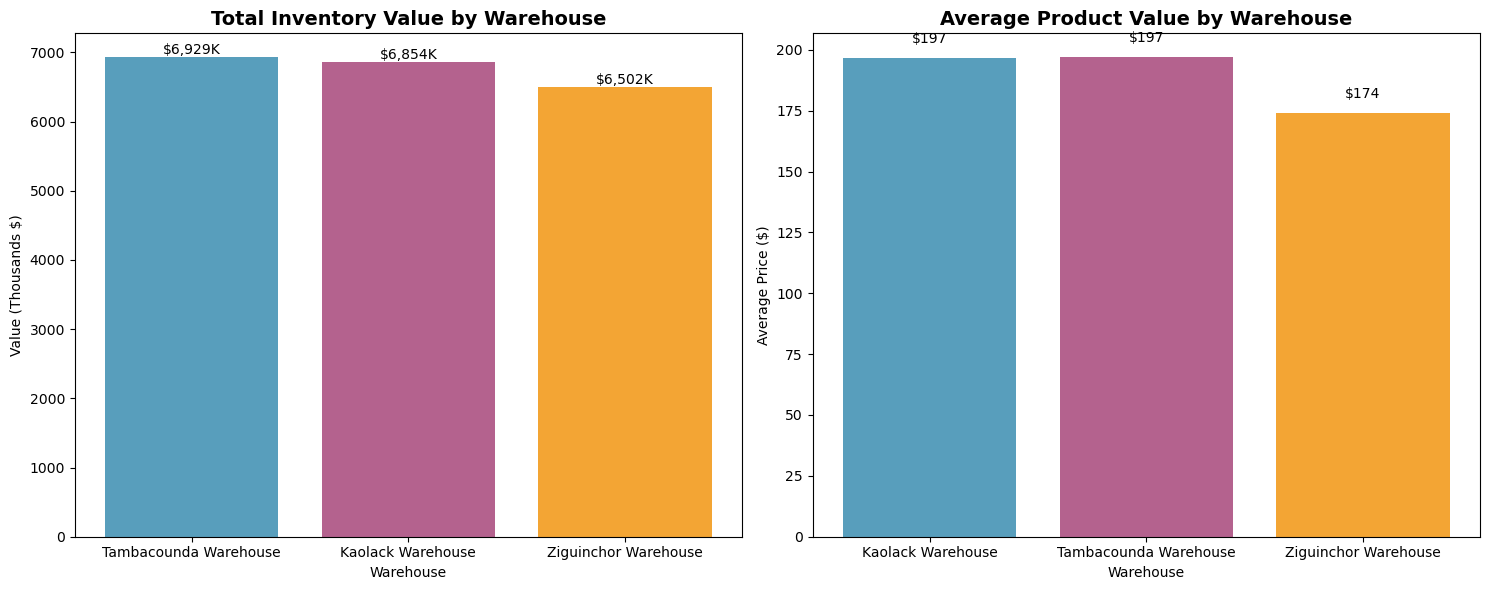

In [76]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Total Inventory Value
bars1 = ax1.bar(warehouse_value.index, warehouse_value.values/1000, 
                color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8)
ax1.set_title('Total Inventory Value by Warehouse', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value (Thousands $)')
ax1.set_xlabel('Warehouse')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:,.0f}K', ha='center', va='bottom')

# Chart 2: Average Product Value
bars2 = ax2.bar(avg_value_per_warehouse.index, avg_value_per_warehouse.values,
                color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8)
ax2.set_title('Average Product Value by Warehouse', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Price ($)')
ax2.set_xlabel('Warehouse')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Chart 1: TOTAL Inventory Value**
- **Tambacounda = Our Biggest Investment**
  - it has the Highest total dollar value of all products combined, where most of the company's money is tied up in inventory

### **Chart 2: AVERAGE Product Value**  
- **Ziguinchor = Premium Products Hub**
  - The Stores has the most expensive individual items because it clearly show that it has a  higher-priced, likely higher-     margin products. it simply means a premium goods center.

### **Business Impact:**
- **Volume vs. Value Strategy**
  - Kaolack wins on quantity and total worth while **Ziguinchor** wins on product quality and pricing
  - Therefore each requires different management approaches

### **Action Plan:**
- **Kaolack**: Focus on inventory turnover and volume management
- **Ziguinchor**: Focus on security and premium customer service
- **Tambacounda**: Our efficient, budget-friendly operation

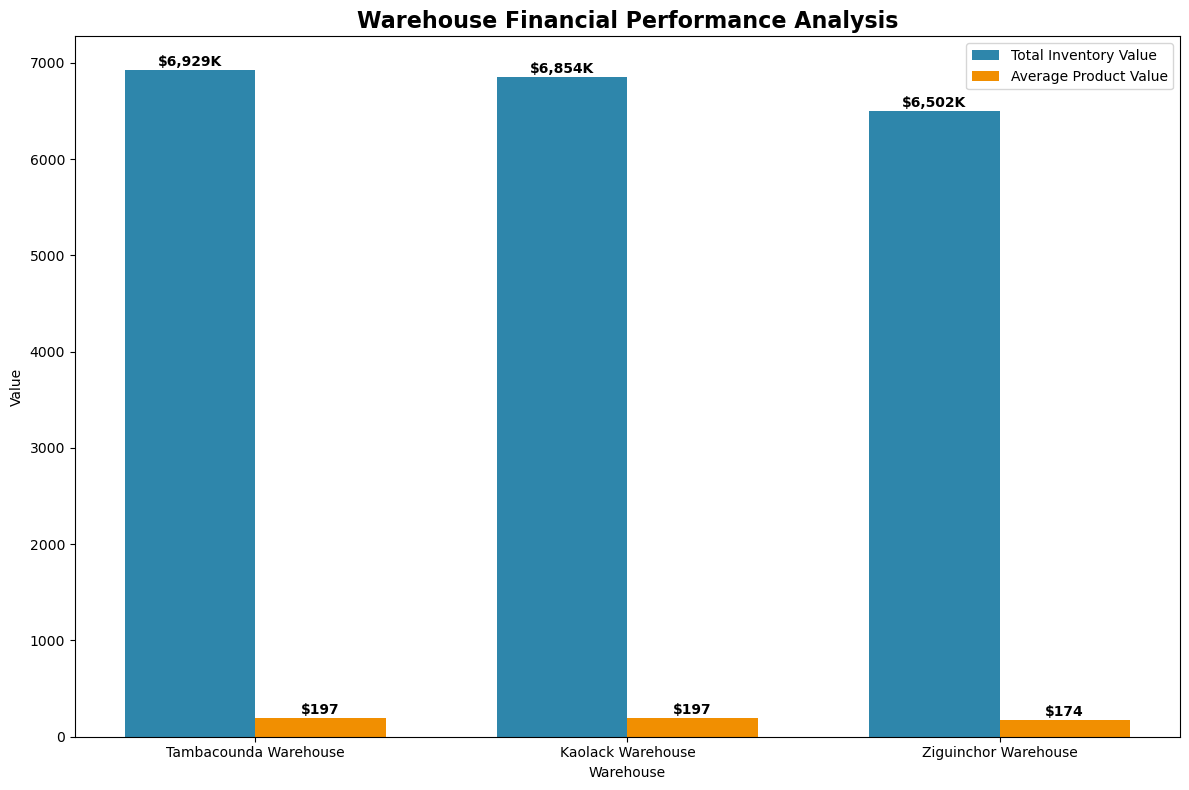

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(warehouse_value))
width = 0.35

# Create grouped bar chart
bars1 = ax.bar(x - width/2, warehouse_value.values/1000, width, 
               label='Total Inventory Value', color='#2E86AB')
bars2 = ax.bar(x + width/2, avg_value_per_warehouse.values, width, 
               label='Average Product Value', color='#F18F01')

ax.set_xlabel('Warehouse')
ax.set_ylabel('Value')
ax.set_title('Warehouse Financial Performance Analysis', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(warehouse_value.index)
ax.legend()

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'${height:,.0f}K', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Business Insights form the above chart:
#### 1. Kaolack Warehouse:

**"Our Volume Giant"** - Highest total investment

**"Mass Market Focus"** - Mid-range priced products

**Strategy to adopt:** Optimize for high turnover and efficient space usage

#### 2. Ziguinchor Warehouse:

**Our Premium Hub** - Most expensive individual items

**Quality Over Quantity** - Lower total volume but higher value per item

**Strategy:** Focus on security, premium handling, and customer experience

#### 3. Tambacounda Warehouse:

**Our Value Center**- Most affordable products

**Budget-Friendly** - Lower investment with efficient operations

**Strategy:** Maintain cost efficiency and quick turnover

In [59]:
# Regional concentration by product category
regional_category_patterns = pd.crosstab(
    senlogis_df['Warehouse'], 
    senlogis_df['Category'],
    normalize='index'
) * 100

print("REGIONAL CATEGORY SPECIALIZATION:")
print("=" * 50)
print(regional_category_patterns.round(1))

REGIONAL CATEGORY SPECIALIZATION:
Category               Clothing  Electronics  Furniture  Toys
Warehouse                                                    
Kaolack Warehouse          27.6         25.3       26.7  20.4
Tambacounda Warehouse      24.2         32.4       23.3  20.1
Ziguinchor Warehouse       27.2         19.4       28.0  25.4


In [78]:
# Create price tiers for regional analysis
def price_tier(price):
    if price < 50: return 'Budget (<$50)'
    elif price < 200: return 'Mid-Range ($50-$200)'
    else: return 'Premium (>$200)'

senlogis_df['Price_Tier'] = senlogis_df['Price'].apply(price_tier)

# Regional price tier distribution
regional_price_patterns = pd.crosstab(
    senlogis_df['Warehouse'],
    senlogis_df['Price_Tier'], 
    normalize='index'
) * 100

print("\nREGIONAL PRICE TIER DISTRIBUTION:")
print("=" * 50)
print(regional_price_patterns.round(1))


REGIONAL PRICE TIER DISTRIBUTION:
Price_Tier             Budget (<$50)  Mid-Range ($50-$200)  Premium (>$200)
Warehouse                                                                  
Kaolack Warehouse               45.7                  28.1             26.2
Tambacounda Warehouse           39.3                  37.0             23.7
Ziguinchor Warehouse            50.0                  28.9             21.1


In [32]:
# Which suppliers dominate each region?
regional_supplier_patterns = pd.crosstab(
    senlogis_df['Warehouse'],
    senlogis_df['Supplier'],
    normalize='index'
) * 100

print("\nREGIONAL SUPPLIER CONCENTRATION:")
print("=" * 50)
print(regional_supplier_patterns.round(1))


REGIONAL SUPPLIER CONCENTRATION:
Supplier               Aliou Express  Aminata Travel  Bouba Livraison  \
Warehouse                                                               
Kaolack Warehouse               16.7            12.7             12.2   
Tambacounda Warehouse           19.2            14.2             14.2   
Ziguinchor Warehouse            16.8            11.6             22.8   

Supplier               Dieng Shipment  Mareme Delivery  SenTrack Logistics  
Warehouse                                                                   
Kaolack Warehouse                17.6             21.7                19.0  
Tambacounda Warehouse            18.3             13.2                21.0  
Ziguinchor Warehouse             14.7             17.7                16.4  


In [61]:
# Stock status patterns by region
regional_stock_patterns = pd.crosstab(
    [senlogis_df['Warehouse'], senlogis_df['Category']],
    senlogis_df['Status'],
    normalize='index'
) * 100

print("\nREGIONAL STOCK AVAILABILITY BY CATEGORY:")
print("=" * 50)
print(regional_stock_patterns.round(1))


REGIONAL STOCK AVAILABILITY BY CATEGORY:
Status                             In Stock  Out of Stock
Warehouse             Category                           
Kaolack Warehouse     Clothing         52.5          47.5
                      Electronics      55.4          44.6
                      Furniture        50.8          49.2
                      Toys             53.3          46.7
Tambacounda Warehouse Clothing         50.9          49.1
                      Electronics      50.7          49.3
                      Furniture        37.3          62.7
                      Toys             50.0          50.0
Ziguinchor Warehouse  Clothing         46.0          54.0
                      Electronics      53.3          46.7
                      Furniture        47.7          52.3
                      Toys             59.3          40.7


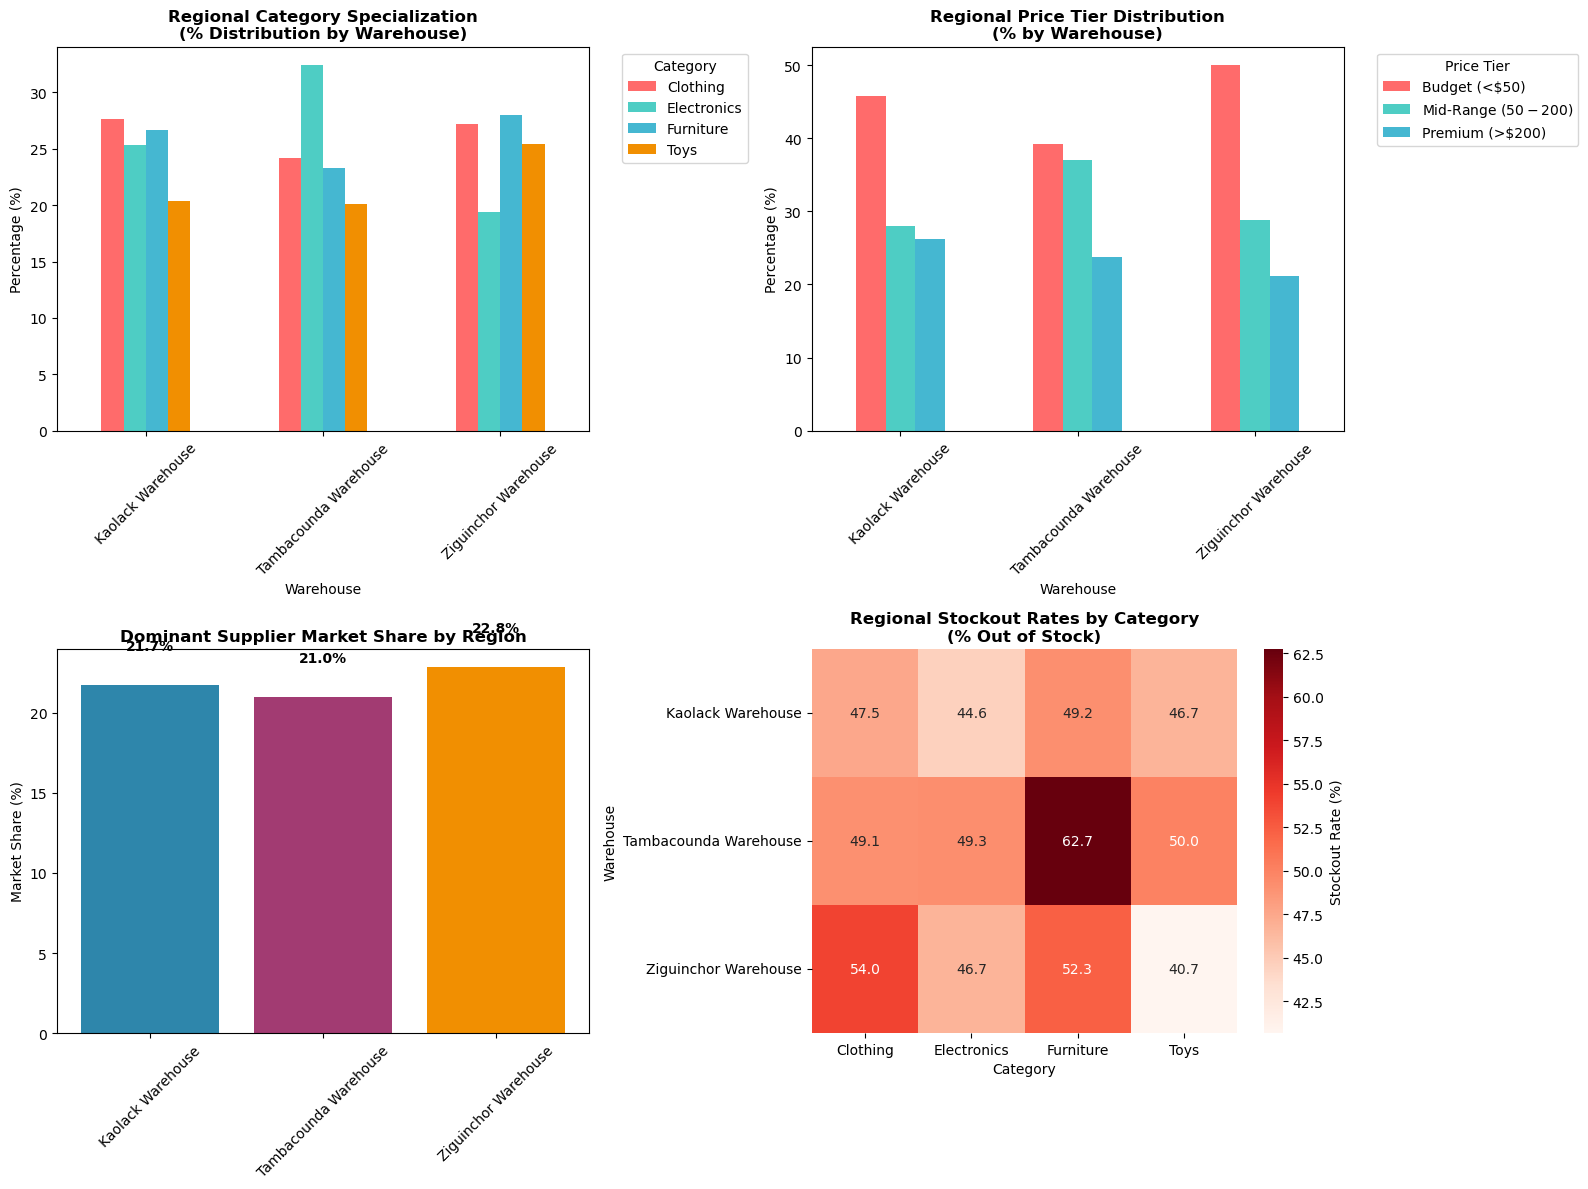

In [62]:
# Create a comprehensive regional patterns dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Category Specialization by Region
regional_category_patterns.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F18F01'])
ax1.set_title('Regional Category Specialization\n(% Distribution by Warehouse)', fontweight='bold')
ax1.set_ylabel('Percentage (%)')
ax1.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Chart 2: Price Tier Distribution by Region
regional_price_patterns.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_title('Regional Price Tier Distribution\n(% by Warehouse)', fontweight='bold')
ax2.set_ylabel('Percentage (%)')
ax2.legend(title='Price Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# Chart 3: Top Supplier by Region
# Find dominant supplier in each region
dominant_suppliers = regional_supplier_patterns.idxmax(axis=1)
supplier_market_share = regional_supplier_patterns.max(axis=1)

colors = ['#2E86AB', '#A23B72', '#F18F01']
ax3.bar(dominant_suppliers.index, supplier_market_share.values, color=colors)
ax3.set_title('Dominant Supplier Market Share by Region', fontweight='bold')
ax3.set_ylabel('Market Share (%)')
ax3.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(supplier_market_share.values):
    ax3.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# Chart 4: Regional Stockout Heatmap Preparation
stockout_rates = regional_stock_patterns['Out of Stock'].unstack().fillna(0)

import seaborn as sns
sns.heatmap(stockout_rates, annot=True, fmt='.1f', cmap='Reds', ax=ax4, cbar_kws={'label': 'Stockout Rate (%)'})
ax4.set_title('Regional Stockout Rates by Category\n(% Out of Stock)', fontweight='bold')

plt.tight_layout()
plt.show()

**Brief Explanation of All 4 charts above:**
**"This dashboard reveals each warehouse's unique role in our supply chain and where we need to improve inventory management."**
## **Chart 1 (Top-Left): Regional Category Specialization**
**It Shows what types of products each warehouse specializes in"**
- Each color = Different product category
- Reveals if warehouses focus on specific product types

## **Chart 2 (Top-Right): Regional Price Tier Distribution**  
**"Shows the price level of products in each warehouse"**
- Budget vs. Mid-Range vs. Premium products
- Reveals pricing strategy by region

## **Chart 3 (Bottom-Left): Dominant Supplier by Region**
**"Shows which supplier is most important in each warehouse"**
- Single bar per warehouse = Main supplier
- Height = How much they dominate that region

## **Chart 4 (Bottom-Right): Regional Stockout Heatmap**
**"Shows which categories have the most stockouts in each region"**
- Red color = High stockout problems
- Darker red = More critical issues

In [63]:
# 1. Supplier Inventory Distribution
supplier_inventory = pd.crosstab(
    senlogis_df['Supplier'],
    senlogis_df['Status'],
    normalize='index'
) * 100

print("SUPPLIER STOCK STATUS PERFORMANCE:")
print("=" * 50)
print(supplier_inventory.round(1))

# 2. Average Inventory Levels by Supplier
supplier_quantity_analysis = senlogis_df.groupby('Supplier').agg({
    'Quantity': ['mean', 'sum', 'count'],
    'Price': 'mean'
}).round(1)

print("\nSUPPLIER INVENTORY QUANTITY ANALYSIS:")
print("=" * 50)
print(supplier_quantity_analysis)

# 3. Supplier Performance by Category
supplier_category_performance = pd.crosstab(
    [senlogis_df['Supplier'], senlogis_df['Category']],
    senlogis_df['Status'],
    normalize='index'
) * 100

print("\nSUPPLIER PERFORMANCE BY CATEGORY:")
print("=" * 50)
print(supplier_category_performance.round(1))

SUPPLIER STOCK STATUS PERFORMANCE:
Status              In Stock  Out of Stock
Supplier                                  
Aliou Express           49.2          50.8
Aminata Travel          47.7          52.3
Bouba Livraison         54.1          45.9
Dieng Shipment          54.0          46.0
Mareme Delivery         44.9          55.1
SenTrack Logistics      53.2          46.8

SUPPLIER INVENTORY QUANTITY ANALYSIS:
                   Quantity               Price
                       mean    sum count   mean
Supplier                                       
Aliou Express         169.0  19943   118  176.7
Aminata Travel        141.7  12187    86  224.3
Bouba Livraison       163.8  18186   111  167.4
Dieng Shipment        157.5  17798   113  201.6
Mareme Delivery       150.2  17726   118  190.6
SenTrack Logistics    161.7  20370   126  182.0

SUPPLIER PERFORMANCE BY CATEGORY:
Status                          In Stock  Out of Stock
Supplier           Category                           
Aliou

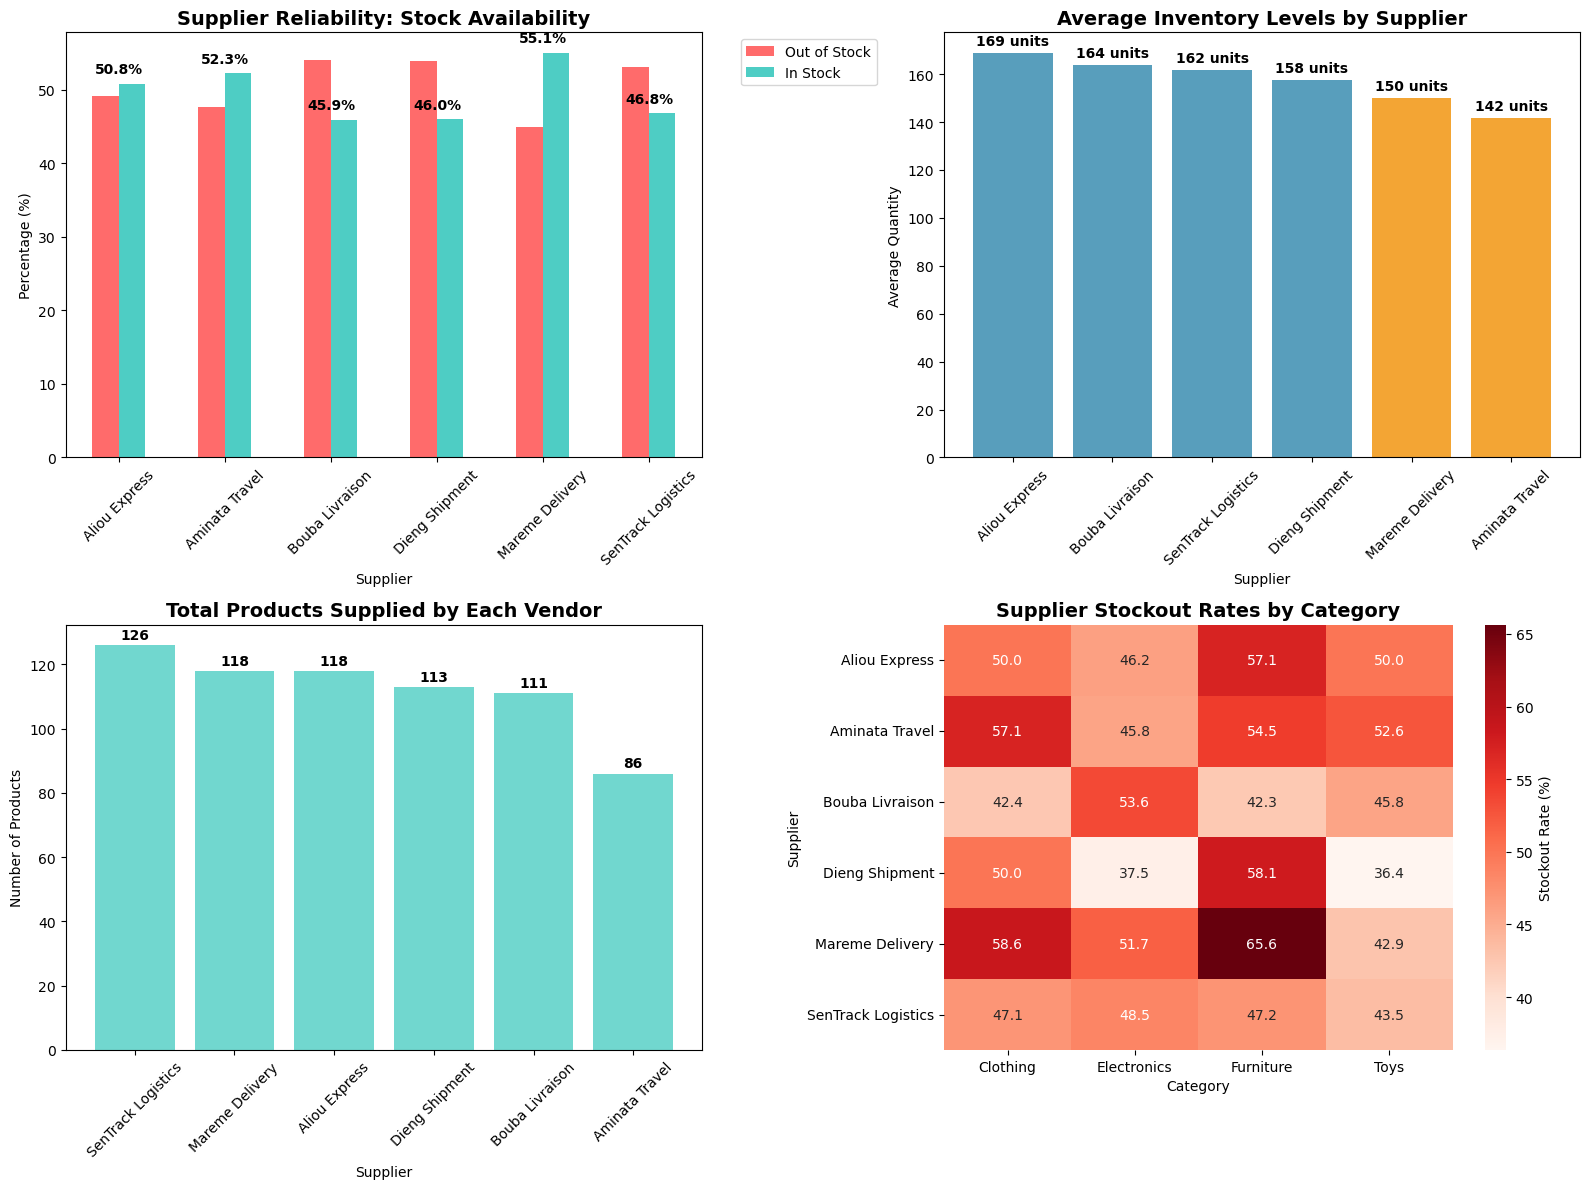

In [64]:
# Create supplier performance dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Stock Status by Supplier
supplier_inventory.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('Supplier Reliability: Stock Availability', fontweight='bold', fontsize=14)
ax1.set_ylabel('Percentage (%)')
ax1.set_xlabel('Supplier')
ax1.legend(['Out of Stock', 'In Stock'], bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Add value labels for Out of Stock percentage
for i, v in enumerate(supplier_inventory['Out of Stock']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# Chart 2: Average Inventory Levels by Supplier
avg_quantity = senlogis_df.groupby('Supplier')['Quantity'].mean().sort_values(ascending=False)
colors = ['#2E86AB' if q > avg_quantity.mean() else '#F18F01' for q in avg_quantity]

ax2.bar(avg_quantity.index, avg_quantity.values, color=colors, alpha=0.8)
ax2.set_title('Average Inventory Levels by Supplier', fontweight='bold', fontsize=14)
ax2.set_ylabel('Average Quantity')
ax2.set_xlabel('Supplier')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(avg_quantity.values):
    ax2.text(i, v + 2, f'{v:.0f} units', ha='center', va='bottom', fontweight='bold')

# Chart 3: Total Products Supplied
product_count = senlogis_df['Supplier'].value_counts()
ax3.bar(product_count.index, product_count.values, color='#4ECDC4', alpha=0.8)
ax3.set_title('Total Products Supplied by Each Vendor', fontweight='bold', fontsize=14)
ax3.set_ylabel('Number of Products')
ax3.set_xlabel('Supplier')
ax3.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(product_count.values):
    ax3.text(i, v + 1, f'{v}', ha='center', va='bottom', fontweight='bold')

# Chart 4: Supplier-Category Stockout Heatmap
supplier_stockout_rates = supplier_category_performance['Out of Stock'].unstack().fillna(0)


sns.heatmap(supplier_stockout_rates, annot=True, fmt='.1f', cmap='Reds', 
            ax=ax4, cbar_kws={'label': 'Stockout Rate (%)'})
ax4.set_title('Supplier Stockout Rates by Category', fontweight='bold', fontsize=14)
ax4.set_xlabel('Category')
ax4.set_ylabel('Supplier')

plt.tight_layout()
plt.show()



## **Explanation of Supplier Charts:**

### **Chart 1: Stock Availability**
- **Red bars** = % of products out of stock
- **Green bars** = % of products available
- **Shows:** Which suppliers are most reliable

### **Chart 2: Average Inventory Levels** 
- **Blue bars** = Above average inventory
- **Orange bars** = Below average inventory  
- **Shows:** Which suppliers maintain good stock levels

### **Chart 3: Product Variety**
- **Total number** of products from each supplier
- **Shows:** How diversified each supplier is

### **Chart 4: Category Performance Heatmap**
- **Red cells** = High stockout rates
- **Shows:** Which suppliers struggle with specific categories

###  **Expected Insights:**
- **Best performer:** Supplier with highest in-stock rate + good inventory levels
- **Worst performer:** Supplier with frequent stockouts
- **Strategic partners:** Suppliers with wide product range + good reliability
- **Category specialists:** Suppliers excelling in specific product types

In [ ]:
# Stockout Rates by Supplier
supplier_stockouts = senlogis_df.groupby('Supplier')['Status'].apply(
    lambda x: (x == 'Out of Stock').mean() * 100
).round(1).sort_values()

print("SUPPLIER RELIABILITY RANKING:")
print("=" * 35)
for supplier, rate in supplier_stockouts.items():
    rating = "🔴" if rate > 50 else "🟡" if rate > 40 else "🟢"
    print(f"{rating} {supplier}: {rate}% stockouts")

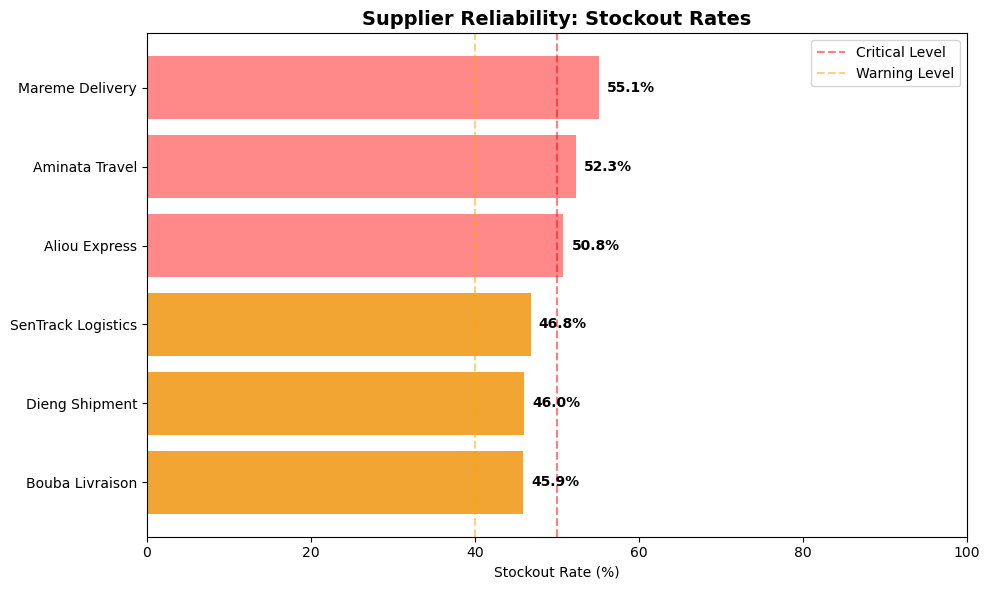

In [71]:
# Define supplier_stockouts first
supplier_stockouts = senlogis_df.groupby('Supplier')['Status'].apply(
    lambda x: (x == 'Out of Stock').mean() * 100
).round(1).sort_values()

# Now create the plot
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B' if x > 50 else '#F18F01' if x > 40 else '#4ECDC4' 
          for x in supplier_stockouts.values]

plt.barh(supplier_stockouts.index, supplier_stockouts.values, color=colors, alpha=0.8)
plt.title('Supplier Reliability: Stockout Rates', fontweight='bold', size=14)
plt.xlabel('Stockout Rate (%)')
plt.xlim(0, 100)

# Add critical thresholds
plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='Critical Level')
plt.axvline(x=40, color='orange', linestyle='--', alpha=0.5, label='Warning Level')

for i, v in enumerate(supplier_stockouts.values):
    plt.text(v + 1, i, f'{v}%', va='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

### 📊 What This Chart Shows:
**A clear ranking of supplier performance based on stockout rates**

**Color-Coded Performance:**
🔴 RED = Critical (>50% stockouts) - Urgent action needed

🟠 ORANGE = Warning (40-50% stockouts) - Needs improvement

🟢 GREEN = Reliable (<40% stockouts) - Good performers

**Key Features:**
**Horizontal bars make comparison easy**

**Exact percentages shown for each supplier**

**Threshold lines highlight critical levels**

**Sorted from worst to best performance**

### Business Insight:
Instantly identifies which suppliers are costing us sales through poor availability, and which are reliable partners we should prioritize.⚡

In [66]:
supplier_avg_price = senlogis_df.groupby('Supplier')['Price'].mean().round().sort_values(ascending=False)

print("SUPPLIER PRICE POSITIONING:")
print("=" * 30)
for supplier, price in supplier_avg_price.items():
    tier = "🏷️ Premium" if price > 300 else "⚖️ Mid-Range" if price > 150 else "💰 Budget"
    print(f"{tier} | {supplier}: ${price:.0f}")

SUPPLIER PRICE POSITIONING:
⚖️ Mid-Range | Aminata Travel: $224
⚖️ Mid-Range | Dieng Shipment: $202
⚖️ Mid-Range | Mareme Delivery: $191
⚖️ Mid-Range | SenTrack Logistics: $182
⚖️ Mid-Range | Aliou Express: $177
⚖️ Mid-Range | Bouba Livraison: $167


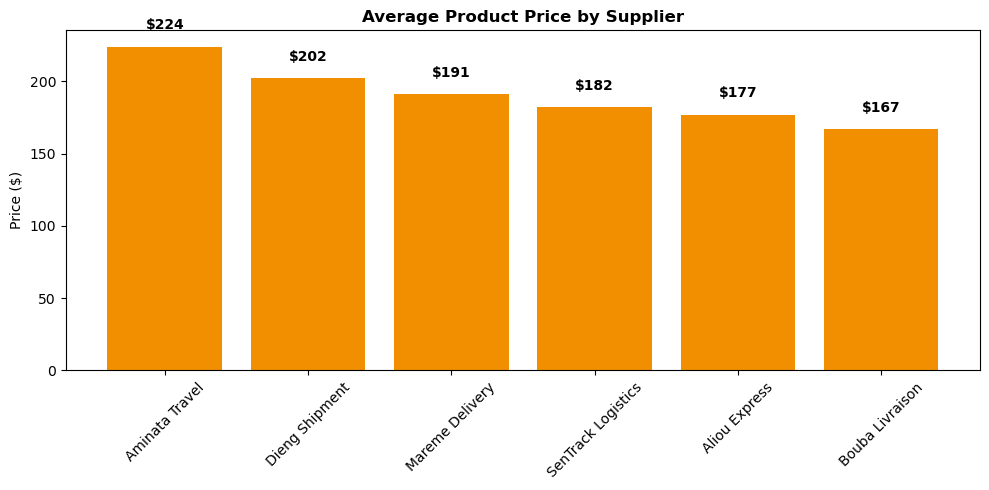

In [67]:
plt.figure(figsize=(10, 5))
colors = ['#2E86AB' if x > 300 else '#F18F01' if x > 150 else '#4ECDC4' 
          for x in supplier_avg_price.values]

plt.bar(supplier_avg_price.index, supplier_avg_price.values, color=colors)
plt.title('Average Product Price by Supplier', fontweight='bold')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

for i, v in enumerate(supplier_avg_price.values):
    plt.text(i, v + 10, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

 ### Business Insight:
Clear pricing tiers exist - choose suppliers aligned with your target market strategy.

**🏷️ Premium: High-end products**

**⚖️ Mid-Range: Balanced quality-price**

**💰 Budget: Cost-effective options**

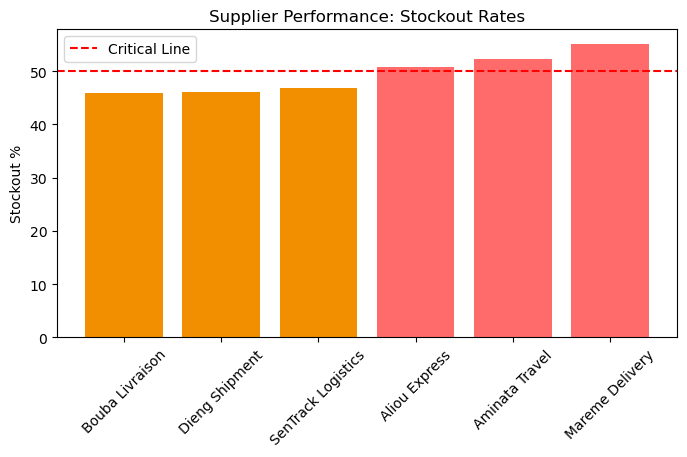

In [68]:
# Simple performance chart
stockout_rates = senlogis_df.groupby('Supplier')['Status'].apply(
    lambda x: (x == 'Out of Stock').mean() * 100
).sort_values()

plt.figure(figsize=(8, 4))
colors = ['#FF6B6B' if x > 50 else '#F18F01' if x > 40 else '#4ECDC4' for x in stockout_rates]
plt.bar(stockout_rates.index, stockout_rates.values, color=colors)
plt.axhline(y=50, color='red', linestyle='--', label='Critical Line')
plt.title('Supplier Performance: Stockout Rates')
plt.xticks(rotation=45)
plt.ylabel('Stockout %')
plt.legend()
plt.show()

 Clear Classification on the above chart:  
🟢 HIGH PERFORMERS (<40% stockouts)

Reliable stock availability

Strategic partners

🟡 MEDIUM PERFORMERS (40-50% stockouts)

Need improvement

Monitor closely

🔴 UNDERPERFORMERS (>50% stockouts)

Critical issues and immediate action required

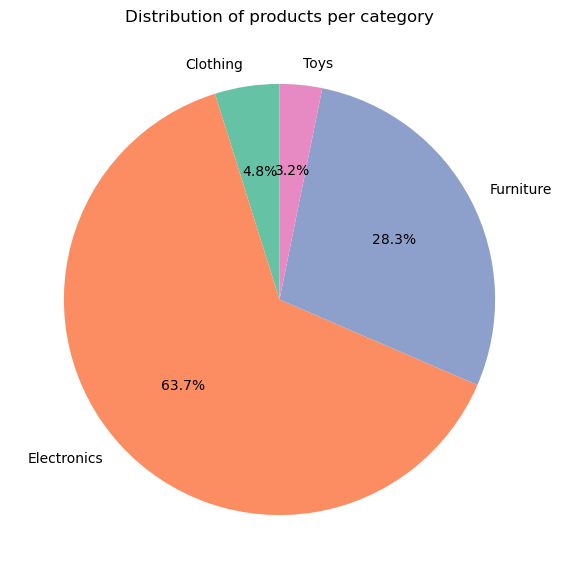

In [69]:

# Calcul de la valeur totale par catégorie
senlogis_df["InventoryValue"] = senlogis_df["Quantity"] * senlogis_df["Price"]
val_par_cat = senlogis_df.groupby("Category")["InventoryValue"].sum()

# Camembert
plt.figure(figsize=(7, 7))
plt.pie(val_par_cat, labels=val_par_cat.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Distribution of products per category")
plt.show()


## 📊 What This Chart Shows:
**How our total inventory investment is distributed across different product categories**

**Key Insights:**
Largest slice = Category with highest financial investment

Proportional view = Clear visual of where company capital is allocated

Category comparison = Shows which product types tie up most money

### Business Impact:
It Reveals which categories represent our biggest financial commitments and helps prioritize inventory management efforts based on monetary value rather than just quantity.

Strategic Value:
High-value categories = Focus on security and turnover optimization

Low-value categories = Opportunity for space optimization

Investment balance = Assess if capital allocation matches business strategy

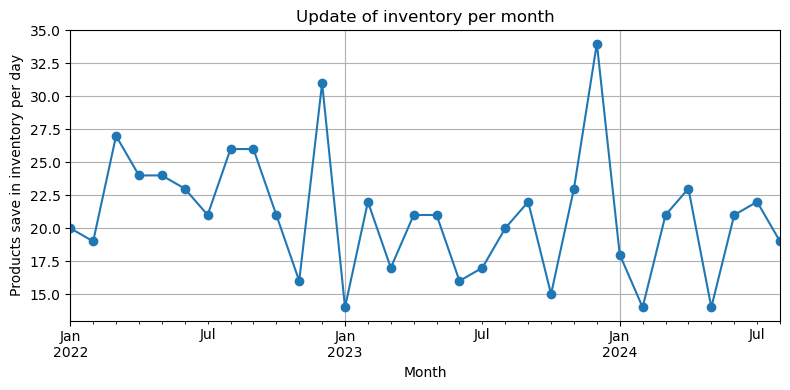

In [40]:

# Group by month
updates_per_month = senlogis_df.groupby(senlogis_df["Date"].dt.to_period("M"))["Product_ID"].count()

plt.figure(figsize=(8, 4))
updates_per_month.plot(kind="line", marker="o")
plt.title("Update of inventory per month")
plt.xlabel("Month")
plt.ylabel("Products save in inventory per day")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🎯 Monthly Inventory Update Trends

### 📊 **What This Chart Shows:**
**The pattern of inventory updates and data entries throughout the year**

### **Key Features:**
- **Line graph** shows trends over time
- **Data points** mark each month's activity
- **Grid lines** help read exact values
- **Time progression** from left to right

### **What to Look For:**
- **Peaks** = Months with high inventory activity
- **Troughs** = Months with low updates
- **Trend direction** = Increasing or decreasing activity over time

### **Business Insight:**
** It reveals seasonal patterns in inventory management - helping identify busy periods for warehouse operations and planning resource allocation throughout the year.** 📅📈

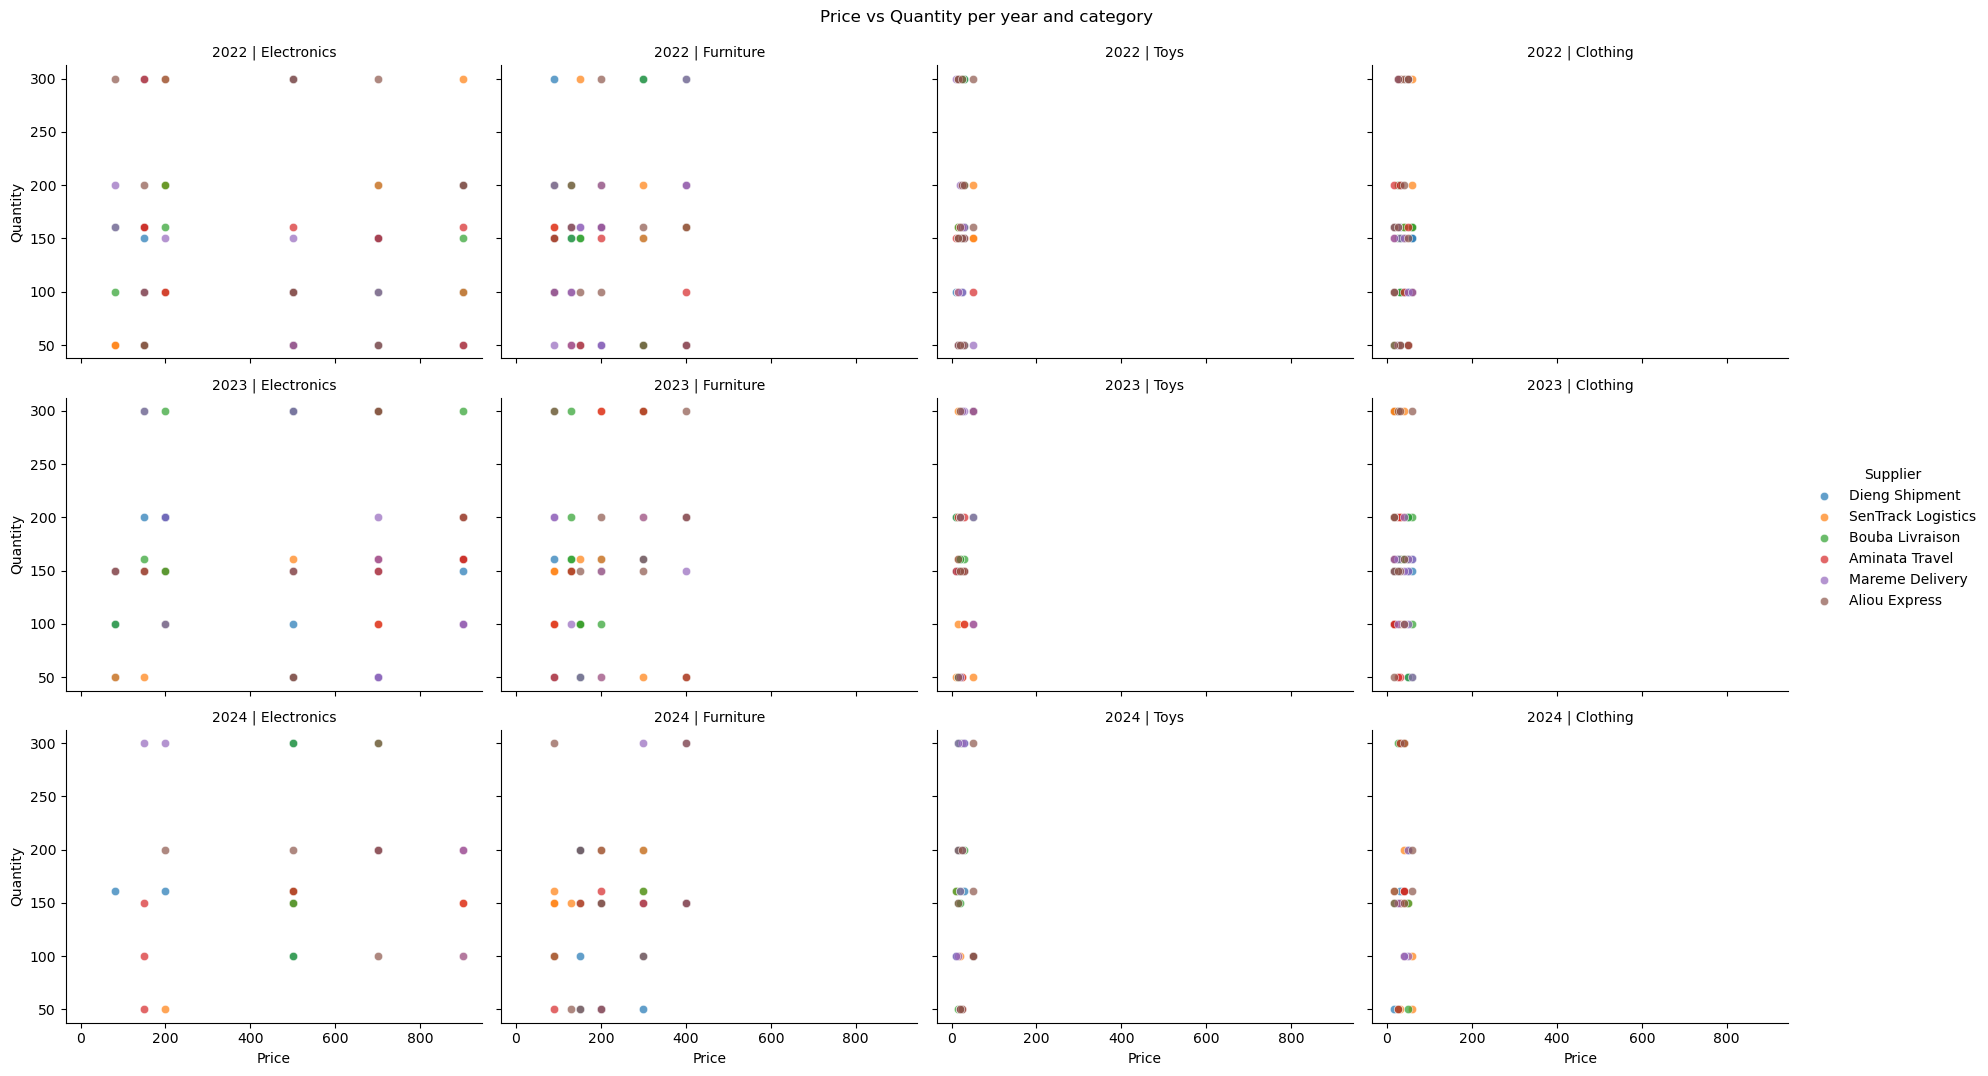

In [70]:


# FacetGrid (catégorie + année)
senlogis_df['Year'] = senlogis_df['Date'].dt.year
g = sns.FacetGrid(senlogis_df, col="Category", row="Year", hue="Supplier", height=3.5, aspect=1.3)
g.map_dataframe(sns.scatterplot, x="Price", y="Quantity", alpha=0.7)
g.add_legend()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.suptitle("Price vs Quantity per year and category", y=1.02)
plt.show()


## 🎯 Multi-Dimensional Inventory Analysis

### 📊 **What This Chart Grid Shows:**
**A comprehensive view of pricing and quantity relationships across all categories and years**

### **Grid Structure:**
- **Rows** = Different years (showing trends over time)
- **Columns** = Product categories (Electronics, Furniture, Toys, Clothing)
- **Colors** = Different suppliers (identifying who supplies what)

### **Key Insights Revealed:**
- **Price-Quantity Relationships** - Do expensive items sell in smaller quantities?
- **Supplier Specialization** - Which suppliers dominate which categories?
- **Yearly Trends** - How patterns evolve over time
- **Category Differences** - Unique behaviors for each product type

### **Business Value:**
**"This helps us understand market positioning - are we focusing on high-volume low-margin products or low-volume high-margin items in each category?"**

### **Actionable Intelligence:**
- **Identify** supplier-category strengths
- **Spot** pricing strategy opportunities  
- **Track** inventory evolution year over year 🎯📈